### FIFA EDA
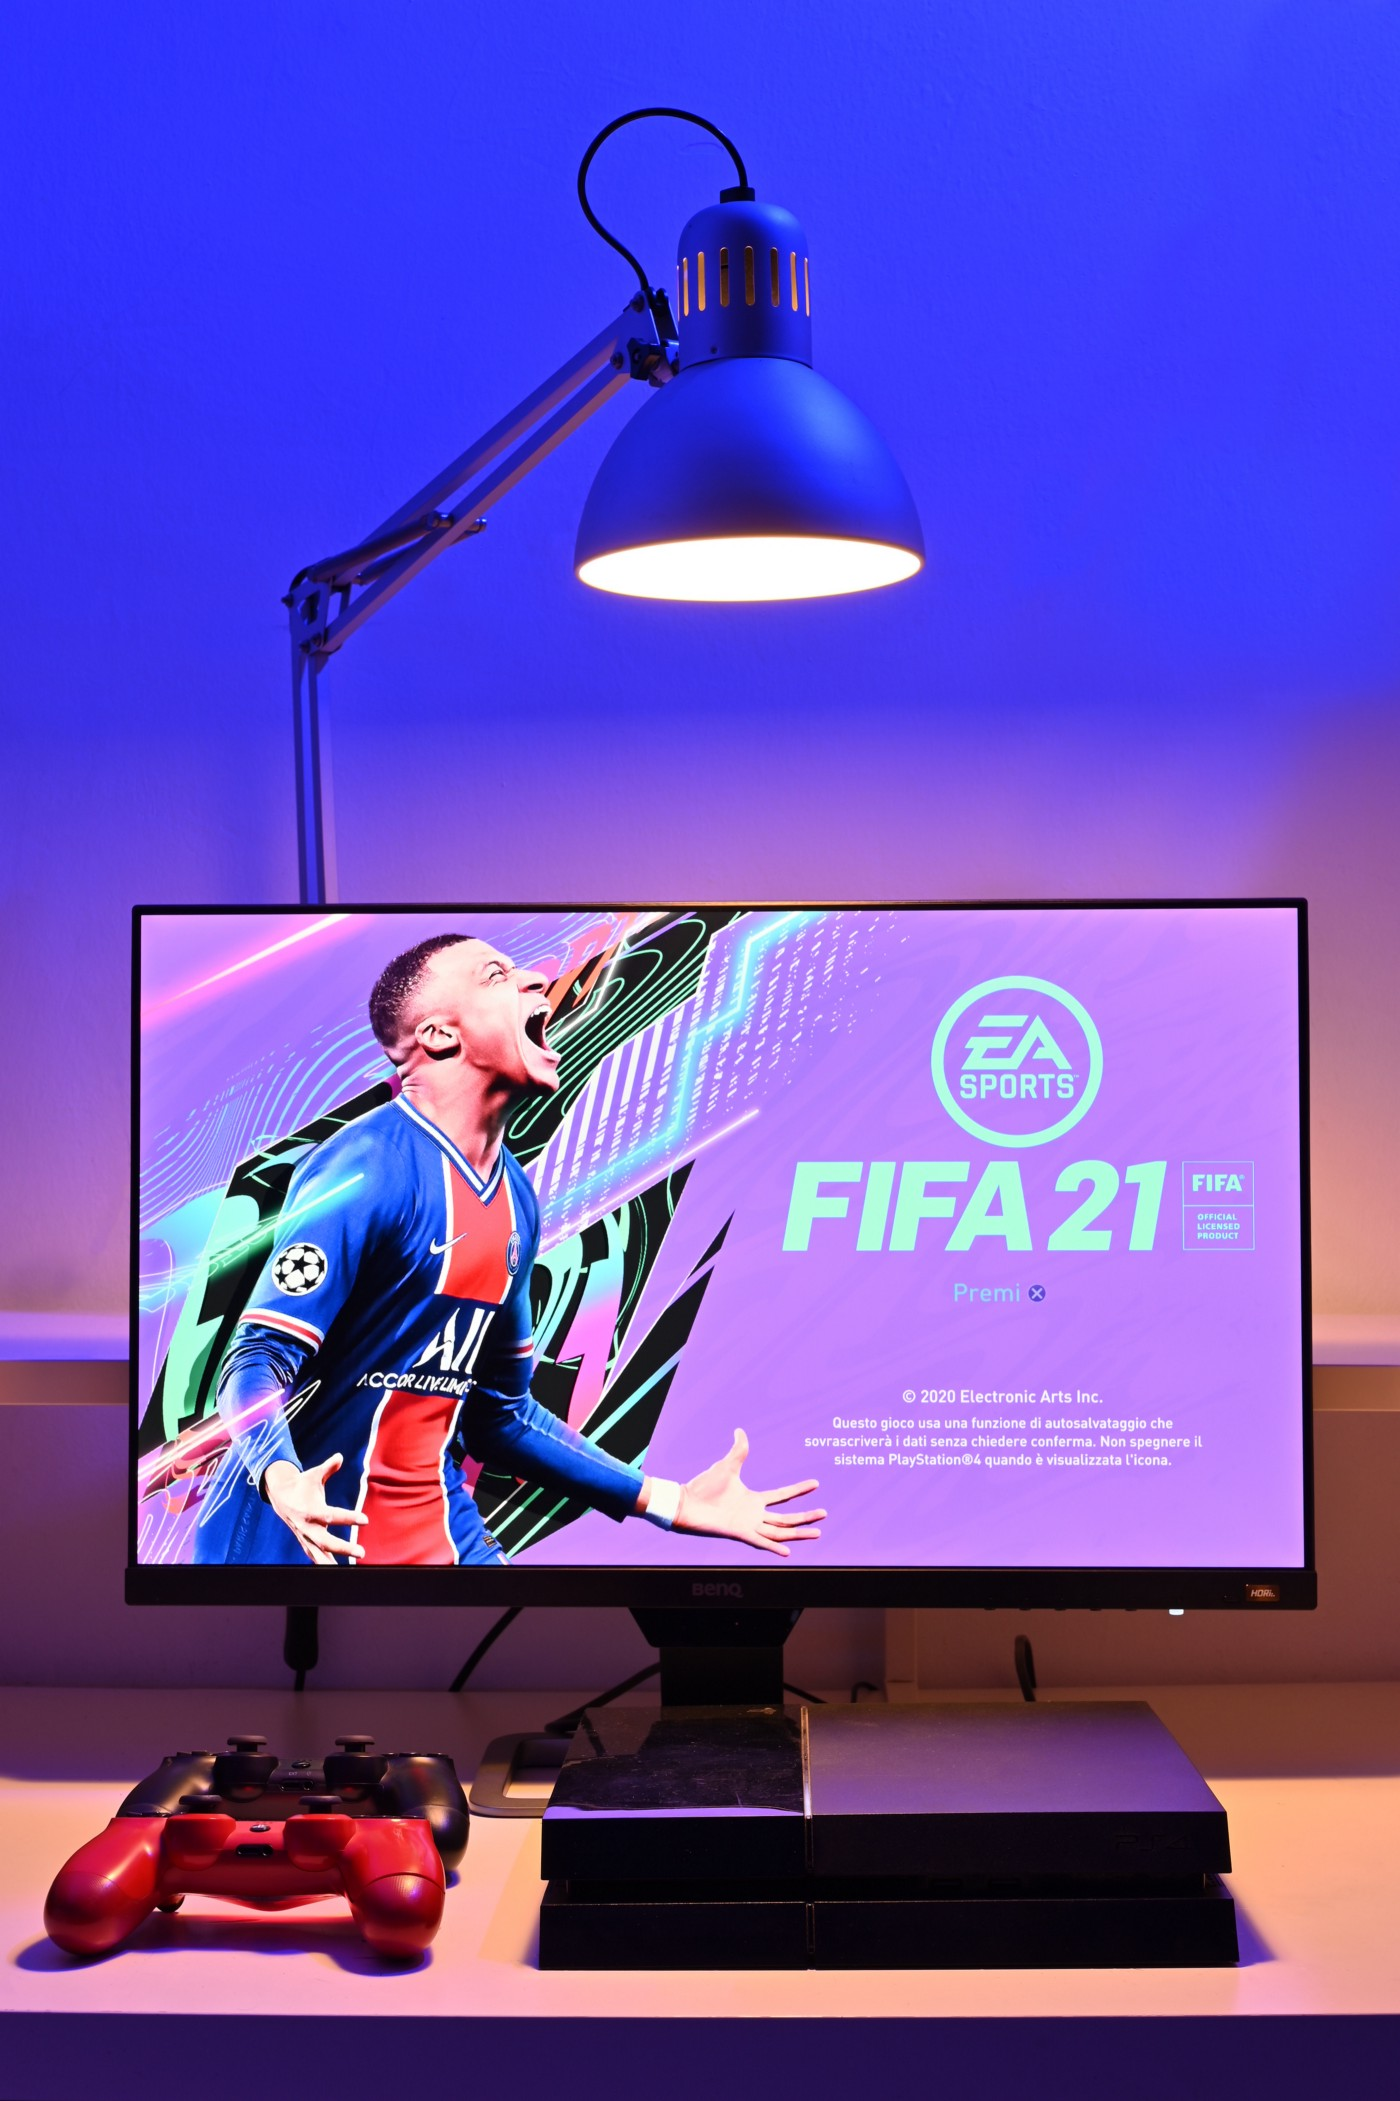

### Exploratory Data analysis:
> This method is use to deep dive into rough data which helps us to gain insight, see anomalies and relationships in the data

in this notebook we are going to use EDA technique to derive insight from the FIFA 2021 edition. comon question to ask include:
- Who are the top fastest players in FIFA 2021?
- Which Players are paid most?
- Who are the Top tallest players?
- Who are the Top strongest players?
- Who are the best players with Long passes?
- Who are the best players with short passes?
- Who are the best defenders?

In [97]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
%matplotlib inline

In [2]:
fifa21 = pd.read_csv('players.csv')
fifa21.sample(7)

,int_player_id,str_player_name,str_positions,dt_date_of_birth,int_height,int_weight,int_overall_rating,int_potential_rating,str_best_position,int_best_overall_rating,...,int_international_reputations,str_work_rate,str_body_type,int_dribbling,int_curve,int_fk_accuracy,int_long_passing,int_ball_control,str_player_speciality,str_trait
7965,7966,Vurnon Anita,"CDM, RB, LB",4/4/1989,168,66,67,67,CDM,67,...,2,Medium/ Medium,Normal (170-),67,52,55,68,71,NaN,NaN
13002,13003,Júlio César Czarnerski,"CF, LW",8/12/1994,172,69,63,66,ST,66,...,1,Medium/ Medium,Normal (170-185),64,54,32,55,62,NaN,NaN
12402,12403,Daniel Jesús Martín Gil,LB,5/31/1997,175,65,63,71,LB,63,...,1,Medium/ Medium,Lean (170-185),60,49,44,42,55,NaN,NaN
13329,13330,Pyry Henri Hidipo Soiri,"LW, RW",9/22/1994,183,63,62,63,LW,62,...,1,High/ Medium,Lean (170-185),63,47,40,55,62,NaN,NaN
16859,16860,Justin Gerard Rennicks,ST,3/20/1999,180,75,57,71,ST,59,...,1,High/ Medium,Lean (170-185),51,42,25,46,56,NaN,NaN
11974,11975,송주훈 宋株熏,CB,1/13/1994,190,83,64,69,CB,66,...,1,Medium/ Medium,Normal (185+),39,22,29,47,53,NaN,['Power Header']
14345,14346,Henry Junior Plazas Mendoza,"RB, CB",12/12/1992,189,83,61,62,CB,63,...,1,Medium/ Medium,Normal (185+),58,47,26,55,57,NaN,NaN


### OVER view
1. **ID** : unique id number to each footballer
2. **Name** : name of footballer
3. **Age** : age of footballer
4. **Photo** : photo of footballer
5. **Nationality** : the nationality of the player
6. **Overall** : in-game power
7. **Potential** : the potential of the football player
8. **Clup**: football player's club
9. **Value** : value of the player
10. **Wage** : wages paid by the player
11. **Special** : special
12. **Preferred Foot** : foot used by the footballer(left,Right)
13. **International Reputation** : the international reputation of the football player
14. **Weak Foot** : weak foot of the footballer
15. **Skill Moves** : football player's skills moves
16. **Work Rate** : football player's work rate
17. **Body Type** : body type of the football player
18. **Real Face** : real face of the player(false,true)
19. **Position** : position played by the football player
20. **Jersey Number** : jersey number of the football player
21. **Joined** : Joined
22. **Loaned From** : is the football player for loaned from
23. **Contract Valid Until** : the expiry date of the player contract
24. **Height** : footballer's height
25. **Weight** : footballer's weight
26. **Crossing** : long cross pass by the footballer
27. **Finishing** : football player finishing
28. **HeadingAccuracy** : HeadingAccuracy
29. **ShortPassing** : ShortPassing
30. **Dribbling** : player's dribbling speed
31. **Curve** : spin on the ball
32. **LongPassing** : football player's long pass
33. **BallControl** : football player control the ball
34. **Acceleration** : the speed of the football player
35. **SprintSpeed** : the sprintSpeed of the player
36. **Agility** : the agility of the football player
37. **Reactions** : the reaction of the footballer
38. **Balance** : football player's balance
39. **ShotPower** : football player's shotpower
40. **Jumping** : the footballer's jumping capacity
41. **Stamina** : the footballer's stamina
42. **Strength** : the strength of the football player
43. **LongShots** : footballer's longest shot
44. **Aggression** : football player's aggression
45. **Positioning** : the position of the football player in the football field
46. **Vision** : football player vision
47. **Penalties** : footballer's penalties
48. **Composure** : the calmness of the football player on the field
49. **Marking** : marking
50. **StandingTackle** : the fight of the football player
51. **SlidingTackle** : slide intervention
52. **GKDiving** : diving
53. **GKHandling** : handling
54. **GKKicking** : kicking
55. **GKPositioning** : Positioning
56. **GKReflexes** : reflexes
57. **Release Clause** : the player's release clause

    **Football Player Position** : LS, ST, RS, LW, LF, CF, RF, RW, LAM, 
    CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, BC, RCB, RB. 


In [3]:
# Check for missing values
fifa21.columns[fifa21.isnull().any()]

Index(['int_team_id', 'str_player_speciality', 'str_trait'], dtype='object')

In [4]:
fifa21['int_team_id'].fillna(value=0, inplace=True)
fifa21['str_player_speciality'].fillna(value='none', inplace=True)
fifa21['str_trait'].fillna(value='none', inplace=True)

In [5]:
# Rename column
fifa21.columns

Index(['int_player_id', 'str_player_name', 'str_positions', 'dt_date_of_birth',
       'int_height', 'int_weight', 'int_overall_rating',
       'int_potential_rating', 'str_best_position', 'int_best_overall_rating',
       'int_value', 'int_wage', 'int_team_id', 'str_nationality',
       'int_crossing', 'int_finishing', 'int_heading_accuracy',
       'int_short_passing', 'int_volleys', 'int_defensive_awareness',
       'int_standing_tackle', 'int_sliding_tackle', 'int_diving',
       'int_handling', 'int_kicking', 'int_gk_positioning', 'int_reflexes',
       'int_aggression', 'int_interceptions', 'int_positioning', 'int_vision',
       'int_penalties', 'int_composure', 'int_acceleration',
       'int_sprint_speed', 'int_agility', 'int_reactions', 'int_balance',
       'int_shot_power', 'int_jumping', 'int_stamina', 'int_strength',
       'int_long_shots', 'str_preferred_foot', 'int_weak_foot',
       'int_skill_moves', 'int_international_reputations', 'str_work_rate',
       'str_body_

In [6]:
# rename the columns in a proper way
fifa21 = fifa21.rename(columns={'int_player_id': 'id', 
    'str_player_name': 'playerName', 'str_positions': 'positions',
    'dt_date_of_birth': 'D.O.B',
'int_height': 'playerHeight', 'int_weight': 'playerWieght', 'int_overall_rating': 'playerRating',
'int_potential_rating': 'playerPORating', 'str_best_position': 'playerBestPosition', 'int_best_overall_rating': 'playerBestRating',
'int_value': 'playerValue', 'int_wage': 'playerWage', 'int_team_id': 'teamId', 'str_nationality': 'PlayerNationality',
'int_crossing': 'Crossing', 'int_finishing': 'Finishing', 'int_heading_accuracy': 'HeadingAccuracy',
'int_short_passing': 'ShortPassing', 'int_volleys': 'Volleys', 'int_defensive_awareness': 'DefenciveAwareness',
'int_standing_tackle': 'StandingTackle','int_sliding_tackle': 'SlidingTackle',
 'int_diving': 'Diving', 'int_handling': 'Handling',
   'int_kicking': 'Kicking', 'int_gk_positioning': 'GkPositioning',
   'int_reflexes': 'Reflexes', 'int_aggression': 'Aggression',
   'int_interceptions': 'Interceptions', 'int_positioning': 'Positioning',
   'int_vision': 'Vision', 'int_penalties': 'Penalties',
   'int_composure': 'Composure', 'int_acceleration': 'Acceleration',
   'int_sprint_speed': 'SprintSpeed', 'int_agility': 'Agility',
   'int_reactions': 'Reactions', 'int_balance': 'Balance',
   'int_shot_power': 'ShotPower', 'int_jumping': 'JumpingPower',
   'int_stamina': 'Stamina', 'int_strength': 'Strength',
   'int_long_shots': 'LongShots', 'str_preferred_foot': 'PreferredFoot',
    'int_weak_foot': 'WeakFoot', 'int_skill_moves': 'SkillMoves',
   'int_international_reputations': 'InternationalReputations', 'str_work_rate': 'WorkRate',
   'str_body_type': 'BodyType', 'int_dribbling': 'Dribbling',
   'int_curve': 'Curve', 'int_fk_accuracy': 'FreekickAccuracy',
   'int_long_passing': 'LongPassing', 'int_ball_control': 'BallControl'})

In [7]:
# fifa21.columns

In [8]:
# getting year and month from DOB
fifa21['D.O.B'] = pd.to_datetime(fifa21['D.O.B'])
fifa21['year'] = fifa21['D.O.B'].dt.year
fifa21['month'] = fifa21['D.O.B'].dt.month
# fifa21

In [9]:
# getting player age
today = pd.to_datetime('2022-07-25')
fifa21['age'] = today.year - fifa21['D.O.B'].dt.year

In [10]:
# Drop columns that are not required
columns = ['teamId', 'str_player_speciality', 'str_trait','id','D.O.B','year','positions','playerRating']
fifa21.drop(columns= columns, axis= 1, inplace= True)
fifa21.sample(7).T

,18321,15842,2378,15514,10683,6497,12999
playerName,Ben Chalton,Malik Batmaz,Felix Bastians,Jesse Bosch,Gijs Smal,Alon Turgeman,Bryan Jerome Gilbert Nouvier
playerHeight,191,180,188,176,183,178,177
playerWieght,86,77,84,76,83,74,70
playerPORating,73,72,74,72,73,68,66
playerBestPosition,GK,ST,CB,CDM,LB,ST,LM
playerBestRating,53,61,74,63,65,68,64
playerValue,230000,550000,2700000,600000,1500000,1200000,625000
playerWage,500,2000,13000,1000,2000,9000,3000
PlayerNationality,England,Turkey,Germany,Netherlands,Netherlands,Israel,France
Crossing,13,24,72,52,73,39,62


In [11]:
# Players body type
fifa21['BodyType'].value_counts()

Normal (170-185)    6535
Lean (170-185)      4116
Normal (185+)       4056
Lean (185+)         1933
Normal (170-)        681
Stocky (170-185)     626
Lean (170-)          462
Stocky (185+)        373
Unique               119
Stocky (170-)        101
Name: BodyType, dtype: int64

In [12]:
# Data-set shape
fifa21.shape

(19002, 51)

In [13]:
fifa21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19002 entries, 0 to 19001
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   playerName                19002 non-null  object
 1   playerHeight              19002 non-null  int64 
 2   playerWieght              19002 non-null  int64 
 3   playerPORating            19002 non-null  int64 
 4   playerBestPosition        19002 non-null  object
 5   playerBestRating          19002 non-null  int64 
 6   playerValue               19002 non-null  int64 
 7   playerWage                19002 non-null  int64 
 8   PlayerNationality         19002 non-null  object
 9   Crossing                  19002 non-null  int64 
 10  Finishing                 19002 non-null  int64 
 11  HeadingAccuracy           19002 non-null  int64 
 12  ShortPassing              19002 non-null  int64 
 13  Volleys                   19002 non-null  int64 
 14  DefenciveAwareness    

<h1 style = "background:lightgreen;border:0">Statistical Analysis</h1>

In [14]:
fifa21.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,playerHeight,playerWieght,playerPORating,playerBestRating,playerValue,playerWage,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,WeakFoot,SkillMoves,InternationalReputations,Dribbling,Curve,FreekickAccuracy,LongPassing,BallControl,month,age
count,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,...,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000
mean,181.225660,75.046311,71.148932,66.784286,2891449.005368,9113.167035,49.690454,45.877329,51.970056,58.808494,...,2.942217,2.365540,1.090569,55.607462,47.271603,42.394432,52.779971,58.552416,5.836123,27.592464
std,6.847472,7.078378,6.115352,6.733926,7733189.305884,19735.324238,18.141514,19.580879,17.323647,14.517060,...,0.669568,0.766687,0.359019,18.786894,18.217325,17.240399,15.172601,16.580120,3.446935,4.715048
min,155.000000,50.000000,48.000000,48.000000,0.000000,0.000000,6.000000,3.000000,5.000000,7.000000,...,1.000000,1.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,1.000000,19.000000
25%,176.000000,70.000000,67.000000,62.000000,475000.000000,1000.000000,38.000000,30.000000,44.000000,54.000000,...,3.000000,2.000000,1.000000,49.000000,35.000000,31.000000,43.000000,54.000000,3.000000,24.000000
50%,181.000000,75.000000,71.000000,67.000000,950000.000000,3000.000000,54.000000,50.000000,55.000000,62.000000,...,3.000000,2.000000,1.000000,61.000000,49.000000,41.000000,56.000000,63.000000,5.000000,27.000000
75%,186.000000,80.000000,75.000000,71.000000,2000000.000000,8000.000000,63.000000,62.000000,64.000000,68.000000,...,3.000000,3.000000,1.000000,68.000000,61.000000,55.000000,64.000000,69.000000,9.000000,31.000000
max,206.000000,110.000000,95.000000,93.000000,185500000.000000,560000.000000,94.000000,95.000000,93.000000,94.000000,...,5.000000,5.000000,5.000000,96.000000,94.000000,94.000000,93.000000,96.000000,12.000000,55.000000


In [15]:
# unique features
fifa21.nunique()

playerName                  18914
playerHeight                   50
playerWieght                   56
playerPORating                 46
playerBestPosition             15
playerBestRating               46
playerValue                   256
playerWage                    133
PlayerNationality             165
Crossing                       89
Finishing                      93
HeadingAccuracy                89
ShortPassing                   86
Volleys                        88
DefenciveAwareness             92
StandingTackle                 87
SlidingTackle                  85
Diving                         69
Handling                       70
Kicking                        79
GkPositioning                  75
Reflexes                       70
Aggression                     88
Interceptions                  89
Positioning                    94
Vision                         86
Penalties                      87
Composure                      85
Acceleration                   85
SprintSpeed   

In [34]:
fifa21.PlayerNationality.value_counts()[:10]

England          1705
Germany          1199
Spain            1063
France           1002
Argentina         932
Brazil            894
Japan             483
Netherlands       446
United States     381
Sweden            381
Name: PlayerNationality, dtype: int64

<h1 style = 'background:lightgreen;border:2'>Fastest Player FIFA21</h1>

In [17]:
playersfast = fifa21[["Acceleration","playerName","playerBestPosition",'age','PlayerNationality','SprintSpeed']].nlargest(8, 'Acceleration').set_index('playerName')
playersfast

,Acceleration,playerBestPosition,age,PlayerNationality,SprintSpeed
playerName,,,,,
Adama Traoré Diarra,97,RM,26,Spain,96
Kylian Mbappé Lottin,96,ST,24,France,96
Raheem Shaquille Sterling,96,LW,28,England,90
Moussa Diaby,96,LM,23,France,90
Alphonso Davies,96,LB,22,Canada,96
Daniel James,96,RM,25,Wales,95
Jérémy Doku,96,RW,20,Belgium,91
Sadio Mané,95,LW,30,Senegal,93


In [18]:
# Tallest player

In [19]:
playerhieght = fifa21[["playerHeight","playerName","playerWieght","playerBestPosition",'age','PlayerNationality']].nlargest(8, 'playerHeight').set_index('playerName')
playerhieght

,playerHeight,playerWieght,playerBestPosition,age,PlayerNationality
playerName,,,,,
Tomáš Holý,206,102,GK,31,Czech Republic
Costel Fane Pantilimon,203,96,GK,35,Romania
Abdoul Bocar Bâ,203,94,CB,28,Mauritania
Aaron James Chapman,203,92,GK,32,England
Vanja Milinković-Savić,202,92,GK,25,Serbia
Kjell Scherpen,202,85,GK,22,Netherlands
Stefan Maierhofer,202,98,ST,40,Austria
Demba Thiam Ngagne,202,87,GK,24,Senegal


In [20]:
# Best Defender

In [21]:
playerdefence = fifa21[["DefenciveAwareness","playerName","playerBestPosition",'age','PlayerNationality']].nlargest(8, 'DefenciveAwareness').set_index('playerName')
playerdefence

,DefenciveAwareness,playerBestPosition,age,PlayerNationality
playerName,,,,
Giorgio Chiellini,94,CB,38,Italy
Virgil van Dijk,93,CB,31,Netherlands
Milan Škriniar,92,CB,27,Slovakia
Kalidou Koulibaly,91,CB,31,Senegal
Mats Hummels,90,CB,34,Germany
Clément Nicolas Laurent Lenglet,90,CB,27,France
Leonardo Bonucci,90,CB,35,Italy
Diego Roberto Godín Leal,90,CB,36,Uruguay


In [22]:
# strongest player

In [23]:
playerstrong = fifa21[["Strength","Stamina","playerName","playerWieght","playerBestPosition",'age','PlayerNationality']].nlargest(8, 'Strength').set_index('playerName')
playerstrong

,Strength,Stamina,playerWieght,playerBestPosition,age,PlayerNationality
playerName,,,,,,
Adebayo Akinfenwa,97,65,110,ST,40,England
Daryl Dike,96,59,100,ST,22,United States
Romelu Lukaku Menama,95,73,94,ST,29,Belgium
Armando Jesús Méndez Alcorta,95,79,82,RB,26,Uruguay
Aleksandar Vukotić,95,61,95,CB,27,Serbia
Joyskim Aurélien Dawa Tchakonte,95,66,95,CB,26,Cameroon
Kalidou Koulibaly,94,70,89,CB,31,Senegal
Sebastián Coates Nión,94,77,92,CB,32,Uruguay


In [24]:
# player with long pass

In [25]:
playerlongp = fifa21[["LongPassing","BallControl","Stamina","playerName","playerBestPosition",'age','PlayerNationality']].nlargest(8, 'LongPassing').set_index('playerName')
playerlongp

,LongPassing,BallControl,Stamina,playerBestPosition,age,PlayerNationality
playerName,,,,,,
Kevin De Bruyne,93,92,89,CAM,31,Belgium
Toni Kroos,93,89,75,CM,32,Germany
Lionel Andrés Messi Cuccittini,91,96,72,RW,35,Argentina
Paul Pogba,91,90,83,CM,29,France
Daniel Parejo Muñoz,90,86,78,CM,33,Spain
Trent Alexander-Arnold,89,87,88,RB,24,England
Luka Modrić,89,90,83,CM,37,Croatia
Marco Verratti,89,90,76,CM,30,Italy


In [26]:
# Best short pass

In [27]:
playershortp = fifa21[["ShortPassing","BallControl","Stamina","playerName","playerBestPosition",'age','PlayerNationality']].nlargest(8, 'ShortPassing').set_index('playerName')
playershortp

,ShortPassing,BallControl,Stamina,playerBestPosition,age,PlayerNationality
playerName,,,,,,
Kevin De Bruyne,94,92,89,CAM,31,Belgium
Toni Kroos,93,89,75,CM,32,Germany
David Josué Jiménez Silva,92,91,70,CAM,36,Spain
Daniel Parejo Muñoz,92,86,78,CM,33,Spain
Lionel Andrés Messi Cuccittini,91,96,72,RW,35,Argentina
Luka Modrić,91,90,83,CM,37,Croatia
Marco Verratti,90,90,76,CM,30,Italy
Frenkie de Jong,90,88,90,CM,25,Netherlands


In [28]:
# Most Paid players

In [29]:
playerwage = fifa21[["playerWage","playerValue","playerBestRating","playerName","playerBestPosition",'age','PlayerNationality']].nlargest(8, 'playerWage').set_index('playerName')
playerwage

,playerWage,playerValue,playerBestRating,playerBestPosition,age,PlayerNationality
playerName,,,,,,
Lionel Andrés Messi Cuccittini,560000,103500000,93,RW,35,Argentina
Kevin De Bruyne,370000,129000000,91,CAM,31,Belgium
Karim Benzema,350000,83500000,89,CF,35,France
Eden Hazard,350000,89500000,88,LW,31,Belgium
Carlos Henrique Venancio Casimiro,310000,90500000,89,CDM,30,Brazil
Toni Kroos,310000,87500000,88,CM,32,Germany
Sergio Ramos García,300000,33500000,89,CB,36,Spain
Sergio Leonel Agüero del Castillo,300000,83500000,89,ST,34,Argentina


In [ ]:
# Best Goalie

In [30]:
playergoalie = fifa21[["Reflexes","Handling","Kicking","playerBestRating","playerName","playerBestPosition",'age','PlayerNationality']].nlargest(8, 'Reflexes').set_index('playerName')
playergoalie

,Reflexes,Handling,Kicking,playerBestRating,playerBestPosition,age,PlayerNationality
playerName,,,,,,,
Jan Oblak,90,92,78,91,GK,29,Slovenia
Marc-André ter Stegen,90,85,88,90,GK,30,Germany
Keylor Navas Gamboa,90,81,75,87,GK,36,Costa Rica
Hugo Lloris,90,82,68,87,GK,36,France
Alisson Ramsés Becker,89,88,85,90,GK,30,Brazil
Manuel Neuer,89,87,91,89,GK,36,Germany
Samir Handanovič,89,85,73,88,GK,38,Slovenia
David De Gea Quintana,89,81,78,86,GK,32,Spain


### Visualization

In [31]:
# Correlation

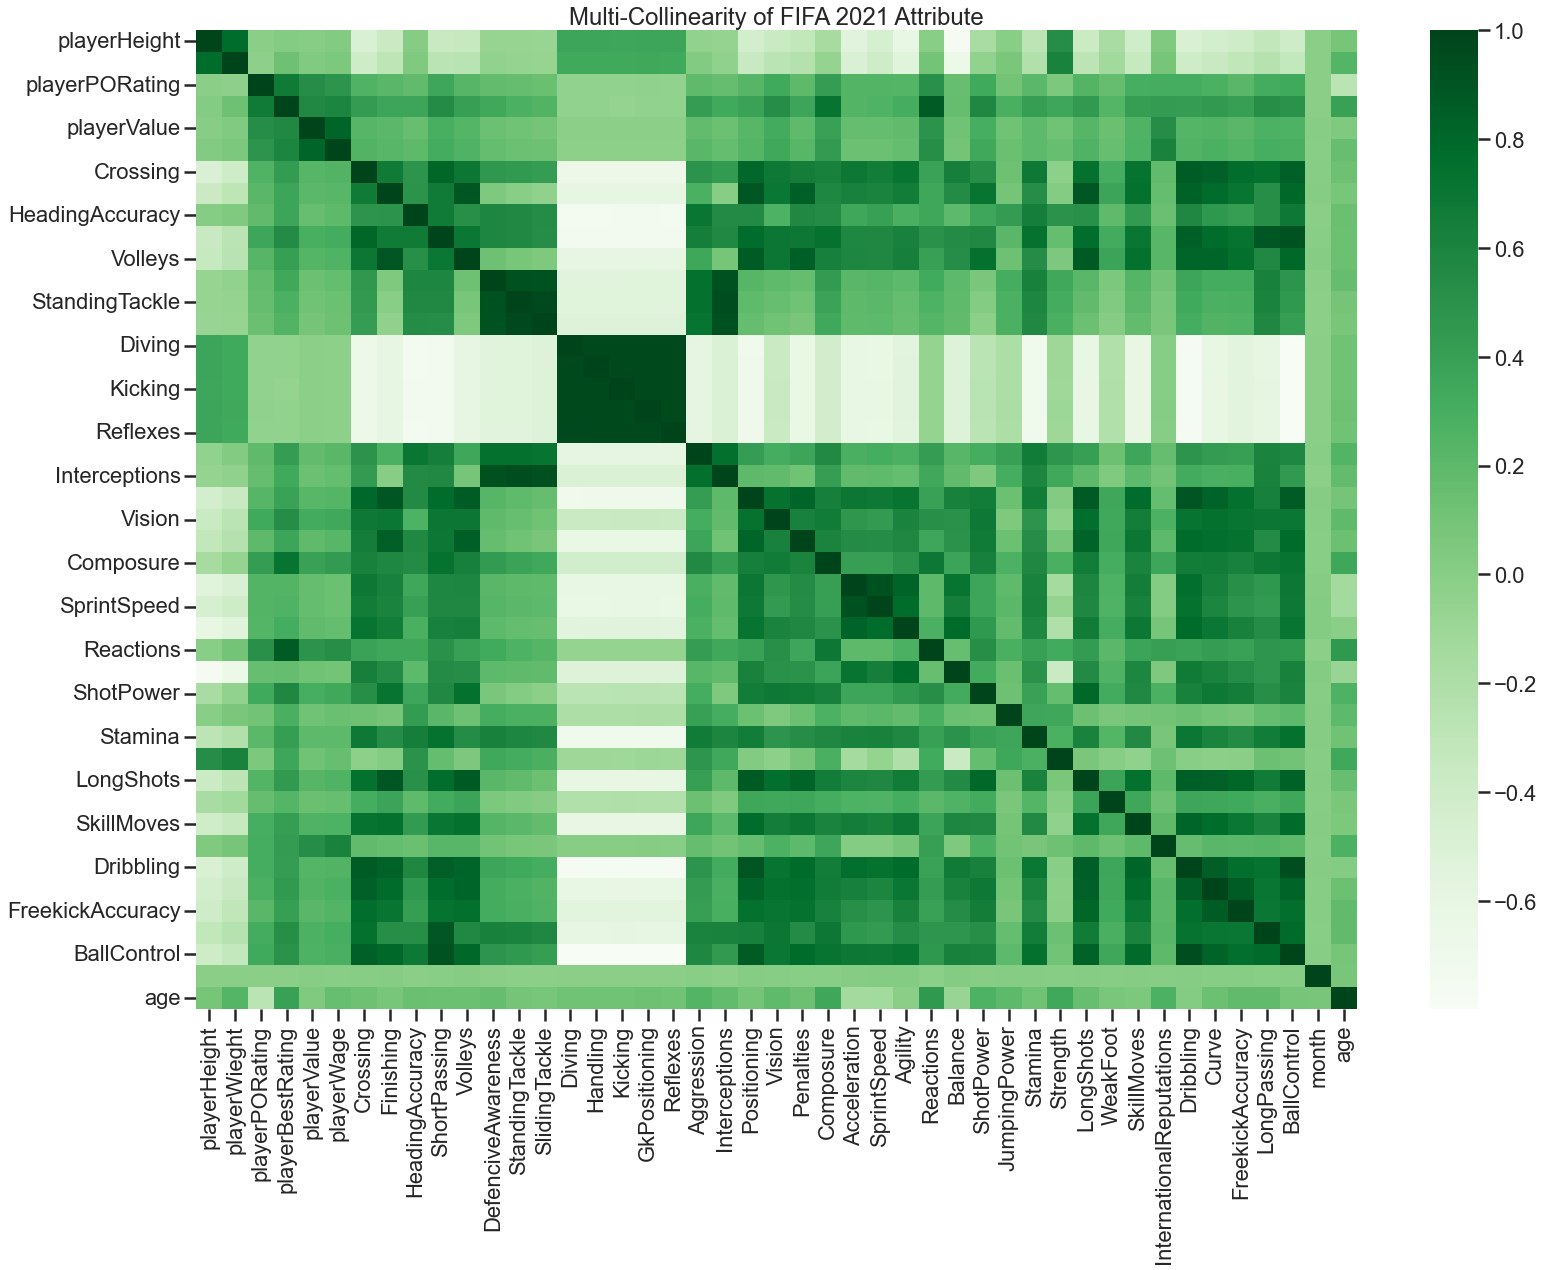

In [43]:
plt.figure(figsize=(26,18))
sns.set_context('poster')
corr = fifa21.corr()
sns.heatmap(corr, cmap='Greens')
plt.title('Multi-Collinearity of FIFA 2021 Attribute')
plt.show()

In [37]:
# Relationship between acceleration and sprint speed

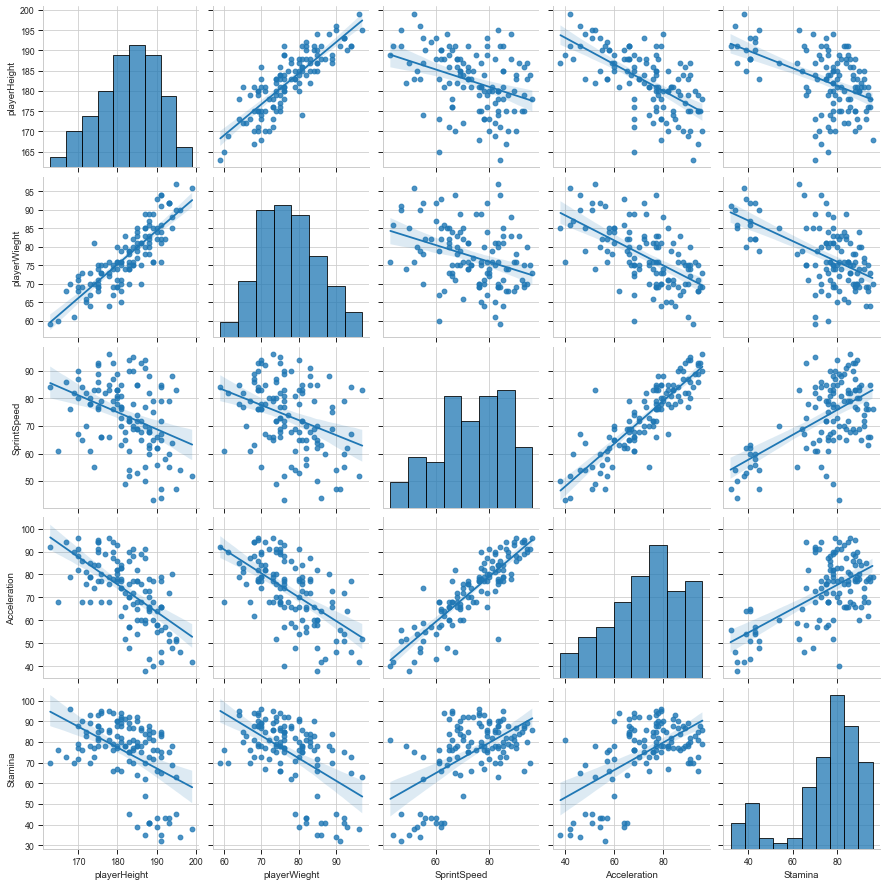

In [44]:
sns.set_context('paper')
data_rel = fifa21.head(120)
sns.pairplot(data_rel, vars=['playerHeight','playerWieght','SprintSpeed','Acceleration','Stamina'], kind='reg')
plt.show()

In [45]:
# WorldCloud of Nationality

(-0.5, 1999.5, 1199.5, -0.5)

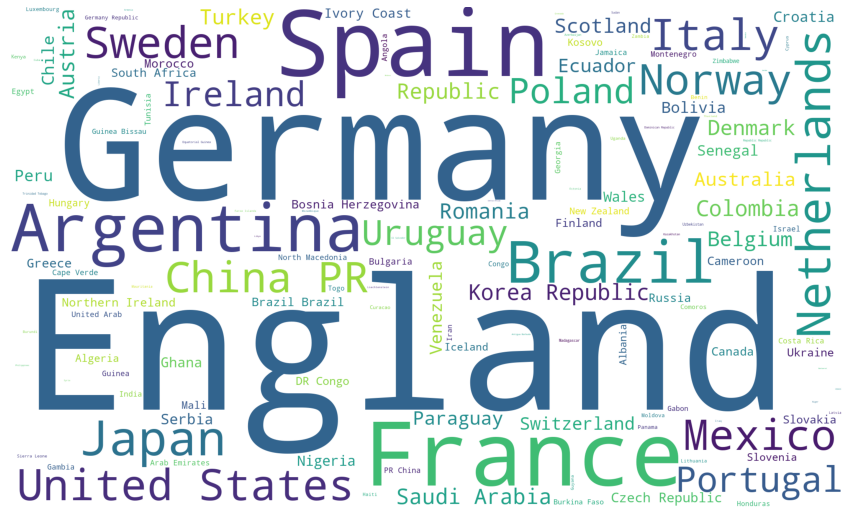

In [49]:
plt.figure(figsize=(15,10))
df_cloud = fifa21.PlayerNationality.copy()
worlcld = WordCloud(
    background_color='white',
    width= 2000,
    height=1200
).generate(" ".join(df_cloud))
plt.imshow(worlcld)
plt.axis('off')

In [ ]:
# Best 20 players

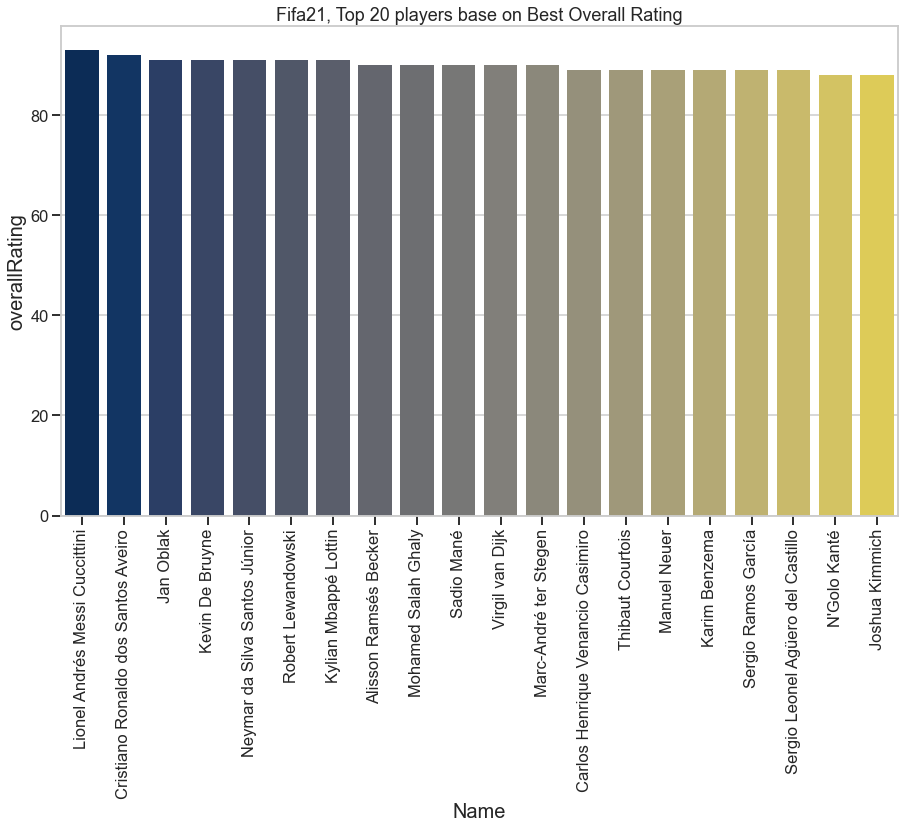

In [63]:
overall = fifa21.playerBestRating.head(20)
player = fifa21.playerName.head(20)
df_best = pd.DataFrame({'Name': player,'overallRating': overall})

x = df_best['Name'] 
y = df_best['overallRating']
sns.set_context('talk')
plt.figure(figsize=(15,9))
ax = sns.barplot(x=x, y=y, palette='cividis')
plt.xticks(rotation=90)
plt.xlabel('Name', size=20)
plt.ylabel('overallRating', size=20)
plt.title('Fifa21, Top 20 players base on Best Overall Rating')
plt.show()

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.1, p.get_height()+30))

In [ ]:
# What foot is preferd most

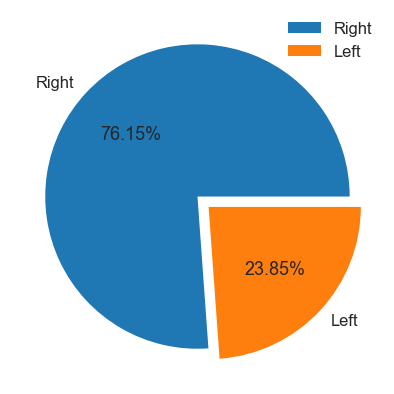

In [66]:
prefare_label = fifa21['PreferredFoot'].value_counts().index
prefare_values = fifa21['PreferredFoot'].value_counts().values
plt.figure(figsize=(10,7))
explode = (0, 0.1)
plt.pie(prefare_values, labels=prefare_label,explode = explode ,autopct='%1.2f%%')
plt.legend()
plt.show()

In [ ]:
# Top three paid high footballers

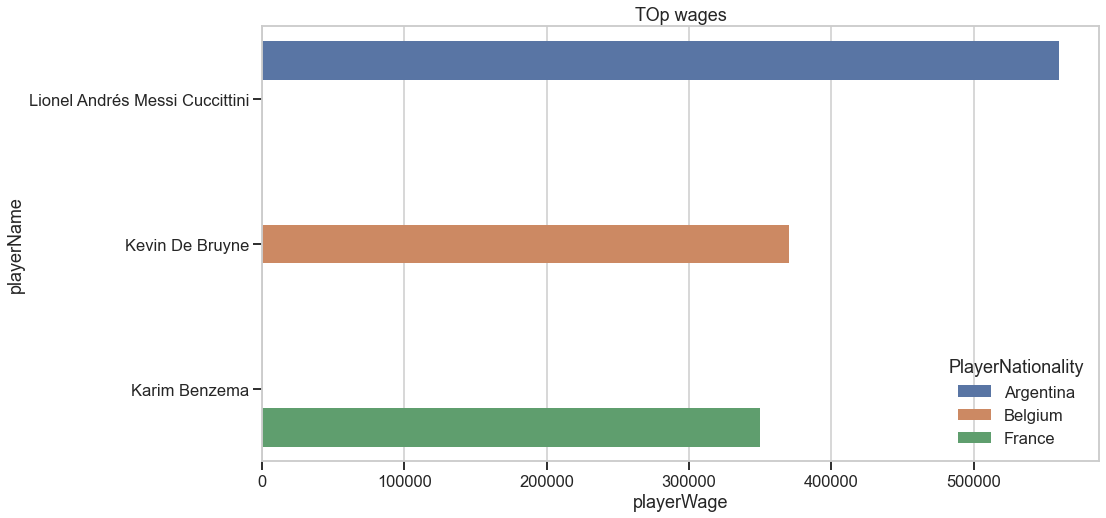

In [68]:
plt.figure(figsize=(15,8))
player_high = fifa21.nlargest(3, 'playerWage').set_index('playerName')
sns.barplot(player_high['playerWage'], player_high.index, ci=None, hue=player_high['PlayerNationality'], palette='deep')
plt.title("TOp wages")
plt.show()

In [69]:
# Most valuable player FIFA21

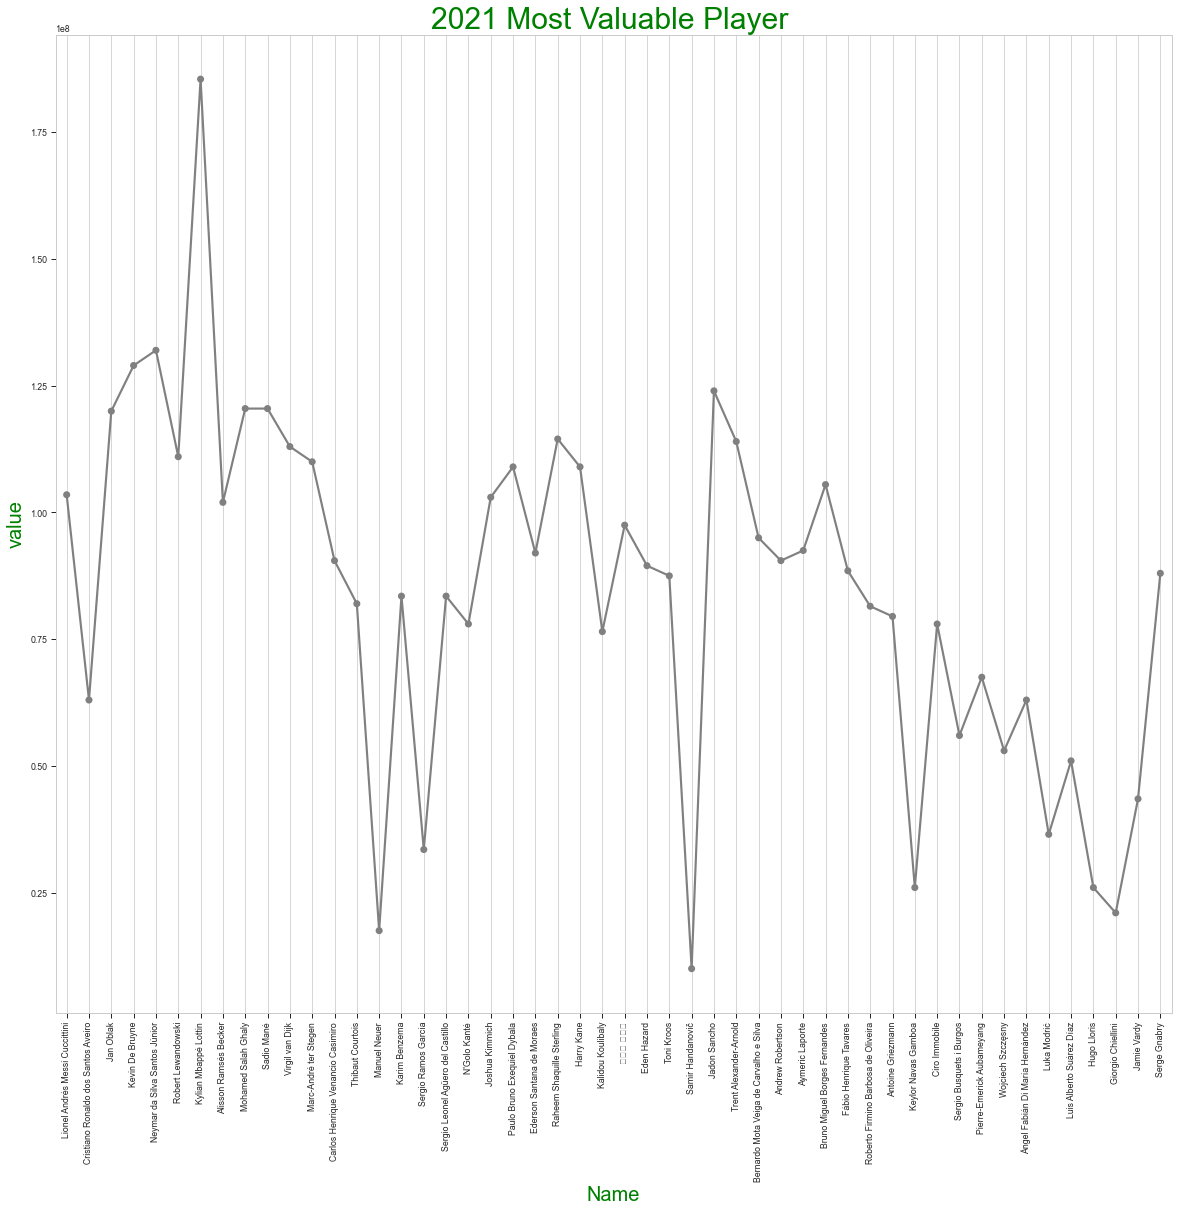

In [78]:
value = list(fifa21.playerValue.head(50))
player = fifa21.playerName.head(50)
df_best = pd.DataFrame({'Name': player,'value': value})

x = df_best['Name'] 
y = df_best['value']
sns.set_context('paper')

f, ax1 = plt.subplots(figsize= (20,18))
sns.pointplot(x=x, y=y, color='gray', alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel('Name', fontsize=20, color='green')
plt.ylabel('value', fontsize=20, color= 'green')
plt.title('2021 Most Valuable Player ',fontsize = 30,color='green')
plt.grid()


In [ ]:
#Fifa 21 Player's Age

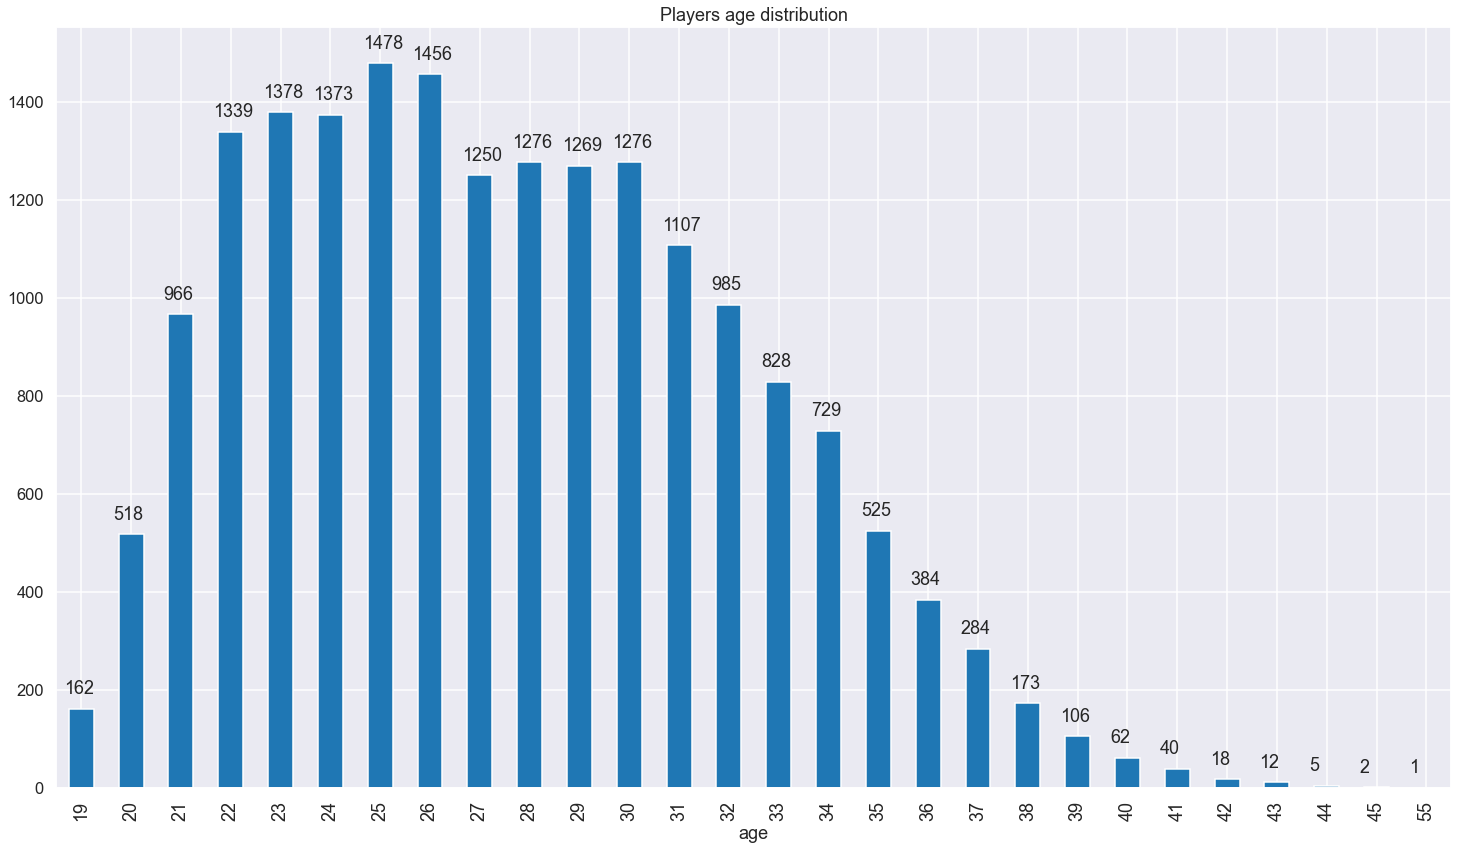

In [91]:
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(25,14))
ax = fifa21.groupby('age')['playerName'].count().plot.bar()
plt.title('Players age distribution')
plt.xticks(fontsize=18)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.1, p.get_height()+30))

In [94]:
# FIFA 21 players skill moves

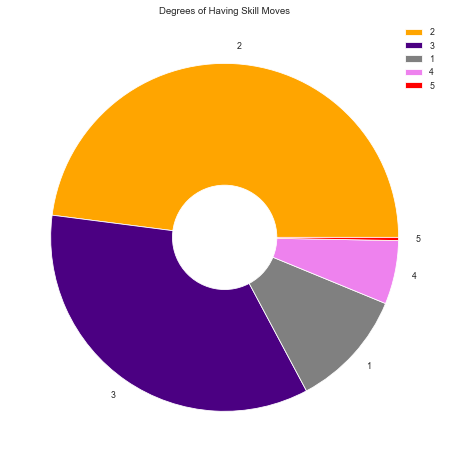

In [95]:
# distribution of skill moves
"""
1.0 = Min
2.0 = 25%
3.0 = 50%
4.0 = 75%
5.0 = Max
"""

sns.set_context('paper')
skill_moves_labels = fifa21["SkillMoves"].value_counts().index 
skill_moves_values = fifa21["SkillMoves"].value_counts().values 
colors = ['orange','indigo','grey','violet','red']

plt.figure(figsize = (8,8))
circle = plt.Circle((0,0),0.3,color = "white") 
plt.pie(skill_moves_values, labels = skill_moves_labels, colors = colors)
p = plt.gcf()
p.gca().add_artist(circle) 
plt.title("Degrees of Having Skill Moves")
plt.legend()
plt.show()

In [96]:
# TOp 10 countries with most players

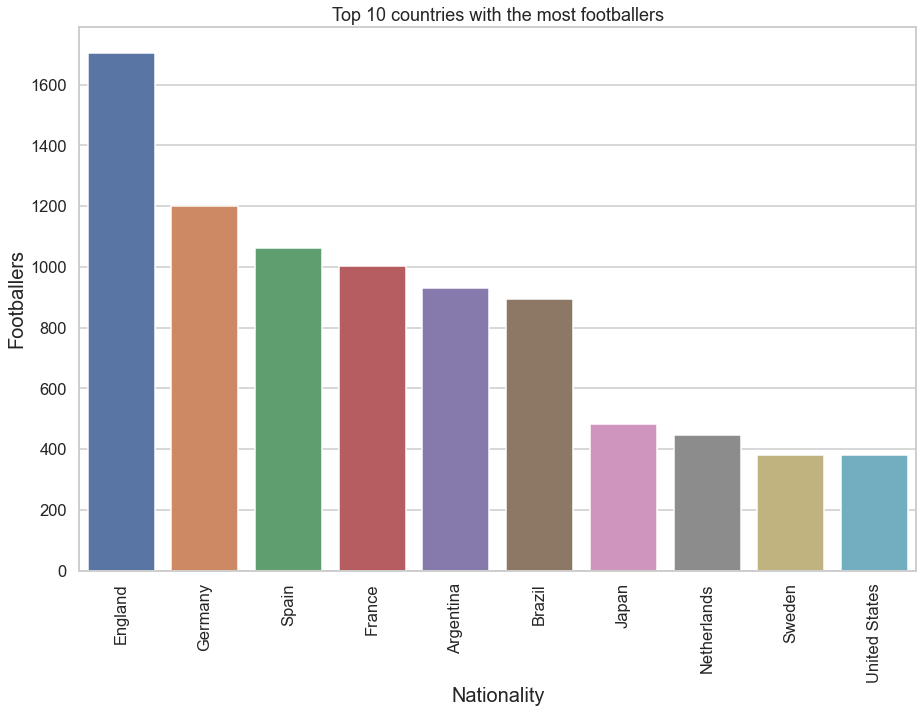

In [101]:
newdf = Counter(fifa21.PlayerNationality)
data = newdf.most_common(10)
sns.set_context('talk')
x,y = zip(*data)
x,y = list(x), list(y)
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x=x,y=y,palette='deep')
plt.xlabel('Nationality', size = 20) 
plt.ylabel('Footballers', size = 20 )
plt.title('Top 10 countries with the most footballers') 
plt.show()

The End!